<a href="https://colab.research.google.com/github/LazyHooks/models_aon/blob/main/consulting2_tr_bp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [25]:

from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


load data

In [27]:
dataset = pd.read_csv('BP_Mainaks Consulting_N.csv')

split

In [28]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

split

In [29]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

fit

In [30]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

print the model

In [31]:
print(model.feature_importances_)

[0.06464609 0.         0.21473937 0.08541122 0.         0.11906579
 0.2674881  0.14734107 0.1013084  0.        ]


feature importance & weights

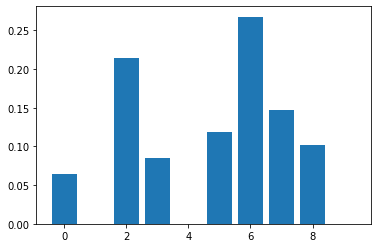

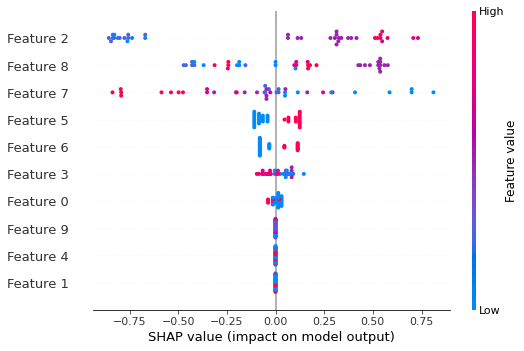

In [32]:
from matplotlib import pyplot
from xgboost import plot_importance
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)
#0-Junior
#1-mid
#2-Pay Positioning Score
#3-Pay Range Score	
#4-Internal focus
#5-Balanced	
#6-External	
#7-Pay Mix Score	
#8-Pay Differentiation Score	
#9 transparency


predict

In [33]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate predictions

In [34]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.23%


visualise single

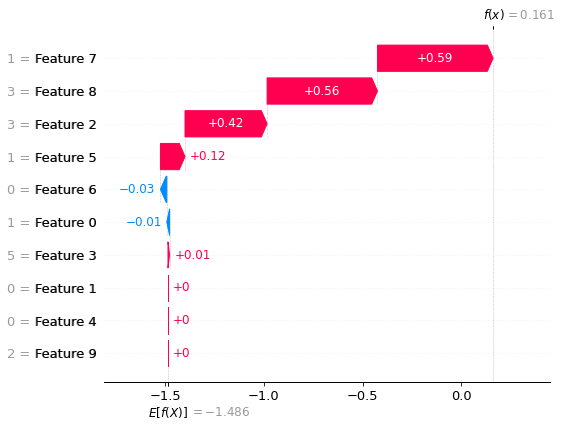

In [35]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

predict 1

In [36]:
#singlepred = model.predict([[]])
#singleprediction = [round(value) for value in y_pred]
#print(singleprediction)